In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

#### 1. Вывести: кол-во наблюдений в датасете
#### 2. Вывести названия столбцов
#### 3. Определить самую частую позицию (item) в заказе 
#### 4. Построить гистрограмму частоты заказов по позициям (item )
#### 5. Измените тип переменной item_price c с помощью лямбды функции
#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)
#### 7. Средняя сумма заказа? (минимум 2 способа)
#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе
#### 9. Определить статистику заказов стейков, а также статистику заказов прожарки.
#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.
#### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.
#### 12. Определить цену по каждой позиции в отдельности. 


Исходные данные

Загрузить данные в pandas

In [24]:
URL = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
df = pd.read_csv(URL, sep='\t')
print(df)

      order_id  ...  item_price
0            1  ...      $2.39 
1            1  ...      $3.39 
2            1  ...      $3.39 
3            1  ...      $2.39 
4            2  ...     $16.98 
...        ...  ...         ...
4617      1833  ...     $11.75 
4618      1833  ...     $11.75 
4619      1834  ...     $11.25 
4620      1834  ...      $8.75 
4621      1834  ...      $8.75 

[4622 rows x 5 columns]


Задание 1

Вывести: кол-во наблюдений в датасете

In [4]:
print("Кол-во наблюдений в датасете: ", len(df.axes[0]))

Кол-во наблюдений в датасете:  4622


Задание 2

Определить самую частую позицию (item) в заказе

In [5]:
print("Самая частая позиция (item) в заказе: ", df.item_name.mode()[0])

Самая частая позиция (item) в заказе:  Chicken Bowl


Задание 4

Построить гистрограмму частоты заказов по позициям (item )

Text(0.5, 0, 'item')

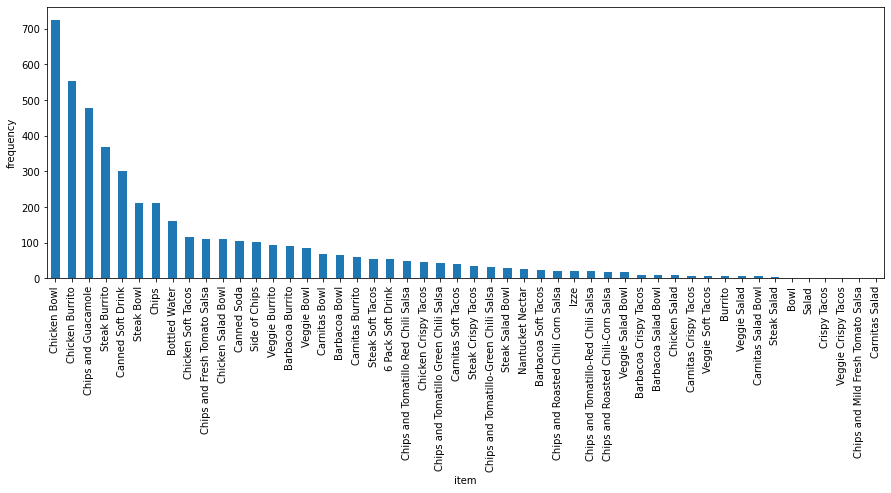

In [8]:
gist = df.item_name.value_counts().plot(kind='bar', figsize=(15, 5))
gist.set_ylabel('frequency')
gist.set_xlabel('item')

Задание 5

Измените тип переменной item_price c с помощью лямбды функции

In [26]:
df.item_price = df.item_price.apply(lambda ItP: float(ItP[1:]))

Задание 6

Построить гистограмму кол-во денег заработанных по каждой позиции (item)

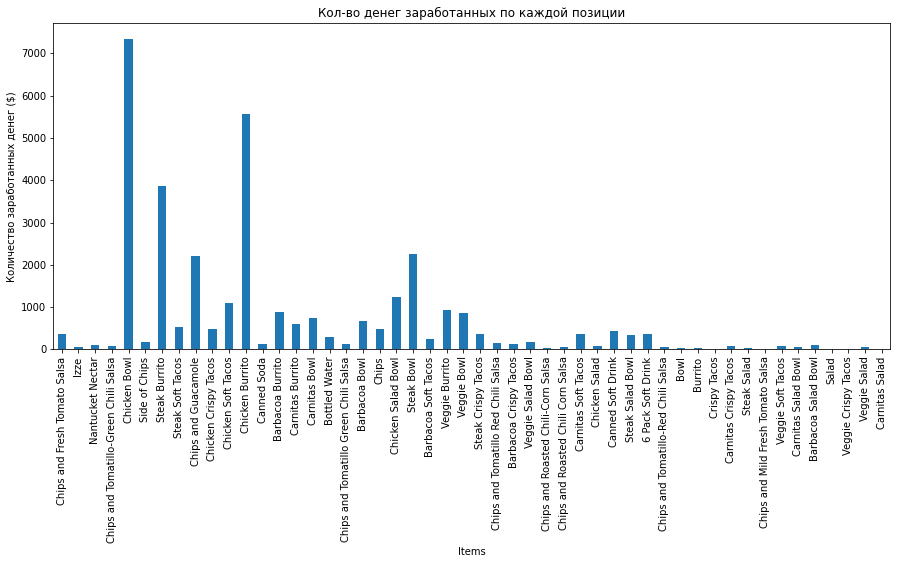

In [15]:
#группируем по позициям
Total = df.groupby('item_name', sort = False).item_price.sum()
ax = Total.plot(y = 'item_price', kind = 'bar', legend = False, figsize = (15, 6))
ax.set(xlabel = 'Items', ylabel = 'Количество заработанных денег ($)')
plt.title('Кол-во денег заработанных по каждой позиции')
plt.show()

Задание 7

Средняя сумма заказа? (минимум 2 способа)

1 способ

In [17]:
AvgSum = df.groupby('order_id', sort = False).item_price.sum().mean()
print("Средняя сумма заказа = ", round(AvgSum, 2))

Средняя сумма заказа =  18.81


2 способ

In [19]:
AvgSum =df.item_price.sum() / df.order_id.drop_duplicates().shape[0]
print("Средняя сумма заказа = ", round(AvgSum, 2))

Средняя сумма заказа =  18.81


Задание 8

Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе

In [20]:
#Группируем заказы по количеству позиций
Gr_ord = df.groupby('order_id', sort = False).item_name.nunique().reset_index()
Gr_ord.agg({'item_name': ['mean', 'min', 'max', 'median']})



,item_name
mean,2.34024
min,1.00000
max,8.00000
median,2.00000


Задание 9

 Определить статистику заказов стейков, а также статистику заказов прожарки.

Статистика по стейкам

In [22]:
St = df.loc[df.item_name.str.contains('Steak')]
St.groupby('item_name')[['quantity', 'item_price']].describe()

quantity                      ... item_price              
                      count      mean       std  ...        50%    75%    max
item_name                                        ...                         
Steak Bowl            211.0  1.047393  0.234278  ...       9.25  11.75  26.07
Steak Burrito         368.0  1.048913  0.239889  ...       9.25  11.75  27.75
Steak Crispy Tacos     35.0  1.028571  0.169031  ...       9.25  11.75  17.98
Steak Salad             4.0  1.000000  0.000000  ...       8.99   8.99   8.99
Steak Salad Bowl       29.0  1.068966  0.257881  ...      11.89  11.89  23.78
Steak Soft Tacos       55.0  1.018182  0.134840  ...       9.25   9.25  18.50

[6 rows x 16 columns]

Статистика по прожарке

In [23]:
sharpness = df[df.choice_description.str.contains('Mild|Medium|Hot', na = False)]
sharpness.groupby('item_name')[['quantity', 'item_price']].describe()

quantity                      ... item_price               
                         count      mean       std  ...        50%     75%    max
item_name                                           ...                          
Barbacoa Bowl             16.0  1.000000  0.000000  ...       8.99  11.480  11.48
Barbacoa Burrito          22.0  1.000000  0.000000  ...       8.99   8.990  11.48
Barbacoa Crispy Tacos      3.0  1.000000  0.000000  ...       8.99  10.235  11.48
Barbacoa Soft Tacos        3.0  1.000000  0.000000  ...       8.99  10.235  11.48
Carnitas Bowl             24.0  1.000000  0.000000  ...       8.99  11.480  11.48
Carnitas Burrito          14.0  1.000000  0.000000  ...       8.99   8.990  11.48
Carnitas Crispy Tacos      3.0  1.333333  0.577350  ...       8.99  13.485  17.98
Carnitas Salad             1.0  1.000000       NaN  ...       8.99   8.990   8.99
Carnitas Soft Tacos        6.0  1.000000  0.000000  ...       8.99   8.990   8.99
Chicken Bowl             168.0  1.113095  0.335978  ...       8.49  10.980  32.94
Chicken Burrito          160.0  1.031250  0.174539  ...       8.49  10.980  21.96
Chicken Crispy Tacos      10.0  1.100000  0.316228  ...       8.49   8.490  16.98
Chicken Salad              9.0  1.000000  0.000000  ...       8.49   8.490  10.98
Chicken Soft Tacos        33.0  1.090909  0.291937  ...       8.49   8.490  21.96
Steak Bowl                61.0  1.049180  0.284384  ...       8.99   8.990  26.07
Steak Burrito            146.0  1.047945  0.214386  ...       8.99   8.990  22.96
Steak Crispy Tacos        10.0  1.100000  0.316228  ...       8.99   8.990  17.98
Steak Salad                3.0  1.000000  0.000000  ...       8.99   8.990   8.99
Steak Soft Tacos          17.0  1.000000  0.000000  ...       8.99   8.990  11.48
Veggie Bowl               20.0  1.100000  0.307794  ...       8.49  10.980  16.98
Veggie Burrito            44.0  1.000000  0.000000  ...       8.49   8.490  10.98
Veggie Crispy Tacos        1.0  1.000000       NaN  ...       8.49   8.490   8.49
Veggie Salad               6.0  1.000000  0.000000  ...       8.49   8.490   8.49
Veggie Soft Tacos          3.0  1.333333  0.577350  ...       8.49  12.735  16.98

[24 rows x 16 columns]

Задание 10

Добавить новый столбец цен на каждую позицию в заказе в рублях.

In [27]:
df['rub_item_price'] = round(df.item_price * 70, 2)


Задание 11

Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.

Группируем заказы по позициям

In [30]:
Gr_by_Pos = df.groupby('order_id', sort = False).agg({'item_name': lambda orders: ", ".join(orders), 
                                                 'item_price':np.sum,
                                                 'quantity':np.sum}).reset_index()
Gr_by_Pos

,order_id,item_name,item_price,quantity
0,1,"Chips and Fresh Tomato Salsa, Izze, Nantucket ...",11.56,4
1,2,Chicken Bowl,16.98,2
2,3,"Chicken Bowl, Side of Chips",12.67,2
3,4,"Steak Burrito, Steak Soft Tacos",21.00,2
4,5,"Steak Burrito, Chips and Guacamole",13.70,2
...,...,...,...,...
1829,1830,"Steak Burrito, Veggie Burrito",23.00,2
1830,1831,"Carnitas Bowl, Chips, Bottled Water",12.90,3
1831,1832,"Chicken Soft Tacos, Chips and Guacamole",13.20,2
1832,1833,"Steak Burrito, Steak Burrito",23.50,2


Группируем заказы по стейкам и прожаркам

In [32]:
St = df.loc[df.item_name.str.contains('Steak')]
Gr_by_St = St.groupby('order_id', sort = False).agg({'item_name': lambda orders: ", ".join(orders), 
                                                 'item_price':np.sum,
                                                 'quantity':np.sum}).reset_index()
Gr_by_St

,order_id,item_name,item_price,quantity
0,4,"Steak Burrito, Steak Soft Tacos",21.00,2
1,5,Steak Burrito,9.25,1
2,16,Steak Burrito,8.99,1
3,20,Steak Burrito,11.75,1
4,21,Steak Burrito,8.99,1
...,...,...,...,...
607,1810,Steak Crispy Tacos,11.75,1
608,1818,Steak Salad Bowl,9.39,1
609,1829,Steak Burrito,11.75,1
610,1830,Steak Burrito,11.75,1


Задание 12

Определить цену по каждой позиции в отдельности.

In [33]:
df.item_price = round(df.item_price / df.quantity, 2)
prices = df.groupby('item_name').agg({"item_price": lambda x: x.unique()})
prices

,item_price
item_name,
6 Pack Soft Drink,6.49
Barbacoa Bowl,"[11.75, 9.25, 8.99, 11.48, 8.69, 11.49]"
Barbacoa Burrito,"[8.99, 9.25, 11.75, 11.08, 8.69, 11.48]"
Barbacoa Crispy Tacos,"[11.75, 9.25, 11.48, 8.99]"
Barbacoa Salad Bowl,"[11.89, 9.39]"
Barbacoa Soft Tacos,"[9.25, 8.99, 11.75, 11.48]"
Bottled Water,"[1.09, 1.5]"
Bowl,7.4
Burrito,7.4
